In [14]:
import nibabel as nib
import numpy as np
import pydicom as pydicom
import os
import sys
import shutil
import SimpleITK as sitk
from glob import glob
import time

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
mypath = "/data/Datasets/stroke/clinical_validation"
mypath_output = "dicom"
mylist = os.listdir(mypath)
mylist.sort()

In [3]:
def writeSlices(series_tag_values, new_img, i, out_dir, ns):
    #print("GG", i)
    #print("GG", ns)
    image_slice = new_img[:,:,ns-i]
    writer = sitk.ImageFileWriter()
    writer.KeepOriginalImageUIDOn()

    # Tags shared by the series.
    list(map(lambda tag_value: image_slice.SetMetaData(tag_value[0], tag_value[1]), series_tag_values))

    # Slice specific tags.
    image_slice.SetMetaData("0008|0012", time.strftime("%Y%m%d")) # Instance Creation Date
    image_slice.SetMetaData("0008|0013", time.strftime("%H%M%S")) # Instance Creation Time

    # Setting the type to CT preserves the slice location.
    image_slice.SetMetaData("0008|0060", "CT")  # set the type to CT so the thickness is carried over

    # (0020, 0032) image position patient determines the 3D spacing between slices.
    image_slice.SetMetaData("0020|0032", '\\'.join(map(str,new_img.TransformIndexToPhysicalPoint((0,0,i))))) # Image Position (Patient)
    image_slice.SetMetaData("0020,0013", str(i)) # Instance Number

    # Write to the output directory and add the extension dcm, to force writing in DICOM format.
    #writer.SetFileName(os.path.join(out_dir,'slice' + str(i).zfill(4) + '.dcm'))
    writer.SetFileName(os.path.join(out_dir, "I"+str(i+1).zfill(5)+".dcm"))
    writer.Execute(image_slice)


def nifti2dicom_1file(in_dir, out_dir):
    """
    This function is to convert only one nifti file into dicom series

    `nifti_dir`: the path to the one nifti file
    `out_dir`: the path to output
    """

    os.makedirs(out_dir, exist_ok=True)

    new_img = sitk.ReadImage(in_dir)
    modification_time = time.strftime("%H%M%S")
    modification_date = time.strftime("%Y%m%d")

    direction = new_img.GetDirection()
    series_tag_values = [("0008|0031",modification_time), # Series Time
                    ("0008|0021",modification_date), # Series Date
                    ("0008|0008","DERIVED\\SECONDARY"), # Image Type
                    ("0020|000e", "1.2.826.0.1.3680043.2.1125."+modification_date+".1"+modification_time), # Series Instance UID
                    ("0020|0037", '\\'.join(map(str, (direction[0], direction[3], direction[6],# Image Orientation (Patient)
                                                        direction[1],direction[4],direction[7])))),
                    ("0008|103e", "Created-Pycad")] # Series Description

    # Write slices to output directory
    #print("GG", new_img.GetDepth())
    ns = new_img.GetDepth()-1
    list(map(lambda i: writeSlices(series_tag_values, new_img, i, out_dir, ns), range(new_img.GetDepth())))

In [4]:
def nifti2dicom(in_dir, out_dir):
    nifti_file = nib.load(in_dir).get_fdata()
    nifti_file = np.rot90(nifti_file, axes=(0,1))
    
    os.makedirs(out_dir, exist_ok=True)
    if nifti_file.ndim > 3:
        nifti_file = nifti_file[:,:,:,0,0]

    ds = pydicom.dcmread('I00001')
    for s in range(nifti_file.shape[2]):
        ds.PixelData = nifti_file[...,s].astype('int16').tobytes()
        ds.save_as(os.path.join(out_dir, "I"+str(s+1).zfill(5)))
        #print("I"+str(s+1).zfill(5))
        #break

In [8]:
for fn in mylist:
    print(fn, "......")
    #os.mkdir(os.path.join(mypath,fn,mypath_output))
    #temp_list = os.listdir(os.path.join(mypath,fn))
    #temp_list.sort()
    temp_list = next(os.walk(os.path.join(mypath,fn)))[2]
    for myfilename in temp_list:
        newfn = myfilename.split(".")[0]
        print(myfilename)
        if "mask" in myfilename:
            #mymask = True
            nifti2dicom_1file(os.path.join(mypath,fn,myfilename), os.path.join(mypath,fn,mypath_output,newfn))
        else:
            nifti2dicom(os.path.join(mypath,fn,myfilename), os.path.join(mypath,fn,mypath_output,newfn))
        #break       
        #os.mkdir(os.path.join(mypath,fn,mypath_output,newfn))
    #break

ACV-106 ......
ACV-106_mask.nii
ACV-106_NCCT.nii.gz
ACV-106_ADC.nii.gz
ACV-127 ......
ACV-127_ADC.nii.gz
ACV-127_mask.nii
ACV-127_NCCT.nii.gz
ACV-130 ......
ACV-130_mask.nii
ACV-130_NCCT.nii.gz
ACV-130_ADC.nii.gz
ACV-174 ......
ACV-174_mask.nii
ACV-174_ADC.nii.gz
ACV-174_NCCT.nii.gz
ACV-192 ......
ACV-192_ADC.nii.gz
ACV-192_NCCT.nii.gz
ACV-192_mask.nii
ACV-224 ......
ACV-224_NCCT.nii.gz
ACV-224_ADC.nii.gz
ACV-224_mask.nii
ACV-225 ......
ACV-225_NCCT.nii.gz
ACV-225_ADC.nii.gz
ACV-225_mask.nii
ACV-226 ......
ACV-226_mask.nii
ACV-226_NCCT.nii.gz
ACV-226_ADC.nii.gz
ACV-229 ......
ACV-229_NCCT.nii.gz
ACV-229_mask.nii
ACV-229_ADC.nii.gz
ACV-231 ......
ACV-231_ADC.nii.gz
ACV-231_mask.nii
ACV-231_NCCT.nii.gz
ACV-233 ......
ACV-233_ADC.nii.gz
ACV-233_NCCT.nii.gz
ACV-233_mask.nii
ACV-234 ......
ACV-234_ADC.nii.gz
ACV-234_NCCT.nii.gz
ACV-234_mask.nii
ACV-237 ......
ACV-237_NCCT.nii.gz
ACV-237_ADC.nii.gz
ACV-237_mask.nii
ACV-238 ......
ACV-238_ADC.nii.gz
ACV-238_NCCT.nii.gz
ACV-238_mask.nii
ACV-24

In [9]:
import glob

path = r'*.nii.gz'
mylist2 = glob.glob(path)
mylist2.sort()
print(mylist2)

['ACV-106.nii.gz', 'ACV-224.nii.gz', 'ACV-226.nii.gz', 'ACV-229.nii.gz', 'ACV-237.nii.gz', 'ACV-246.nii.gz', 'ACV-252.nii.gz', 'ACV-260.nii.gz', 'ACV-267.nii.gz', 'ACV-268.nii.gz', 'ACV-269.nii.gz', 'ACV-281.nii.gz', 'ACV-285.nii.gz', 'ACV-288.nii.gz', 'ACV-289.nii.gz']


In [10]:
mypath = "/data/Datasets/stroke/clinical_validation"
mypath_output = "dicom2"

In [11]:
for fn in mylist2:
    print(fn, "......")
    #os.mkdir(os.path.join(mypath,fn,mypath_output))
    #temp_list = os.listdir(os.path.join(mypath,fn))
    #temp_list.sort()
    #temp_list = next(os.walk(os.path.join(mypath,fn)))[2]
    #for myfilename in temp_list:
    newfn = fn.split(".nii.gz")[0]+"_ADC"
    #print(myfilename)
    #if "mask" in myfilename:
    #    #mymask = True
    #    nifti2dicom_1file(os.path.join(mypath,fn,myfilename), os.path.join(mypath,fn,mypath_output,newfn))
    #else:
    #    nifti2dicom(os.path.join(fn), os.path.join(mypath,fn.split(".nii.gz")[0],mypath_output,newfn))
    nifti2dicom(os.path.join(fn), os.path.join(mypath,fn.split(".nii.gz")[0],mypath_output,newfn))
    #break       
    #os.mkdir(os.path.join(mypath,fn,mypath_output,newfn))
    #break

ACV-106.nii.gz ......
ACV-224.nii.gz ......
ACV-226.nii.gz ......
ACV-229.nii.gz ......
ACV-237.nii.gz ......
ACV-246.nii.gz ......
ACV-252.nii.gz ......
ACV-260.nii.gz ......
ACV-267.nii.gz ......
ACV-268.nii.gz ......
ACV-269.nii.gz ......
ACV-281.nii.gz ......
ACV-285.nii.gz ......
ACV-288.nii.gz ......
ACV-289.nii.gz ......


0 4095
int16
(256, 256)


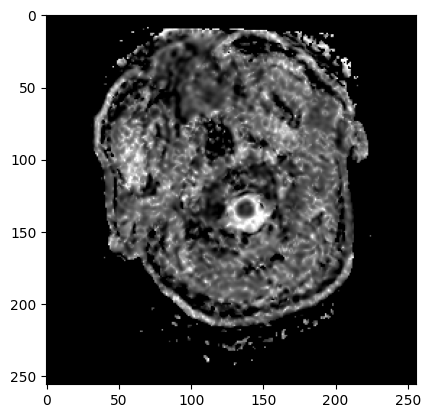

In [115]:
ds = pydicom.dcmread('I00001')
auxdicom = ds.pixel_array

print(np.min(auxdicom), np.max(auxdicom))
print(auxdicom.dtype)
print(auxdicom.shape)
plt.imshow(auxdicom, cmap="gray")
plt.show()

In [116]:
ds.save_as("temp.dcm")

0.0 1.0


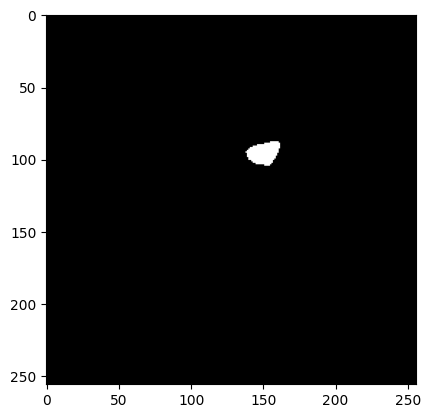

In [130]:
testfile = "/data/Datasets/stroke/clinical_validation/ACV-106/ACV-106_mask.nii"
nifti_file = nib.load(testfile).get_fdata()
print(np.min(nifti_file), np.max(nifti_file))
plt.imshow(nifti_file[...,14], cmap="gray")
plt.show()

In [132]:
nifti_file[...,14][95:105,125:175]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [128]:
ds = pydicom.dcmread('I00001')
ds.PixelData = nifti_file[...,14].astype('int16').tobytes()
#ds.PixelData = nifti_file[...,14].tobytes()
ds.save_as("nuevo")

In [ ]:
ds = pydicom.dcmread("nuevo")
plt.imshow(ds.PixelData)
plt.show()

In [7]:
masksizes = []

for fn in mylist:
    #print(fn, "......")
    #os.mkdir(os.path.join(mypath,fn,mypath_output))
    #temp_list = os.listdir(os.path.join(mypath,fn))
    #temp_list.sort()
    #print("\t", temp_list)
    nifti_file = nib.load(os.path.join(mypath,fn,fn+"_mask.nii")).get_fdata()
    #print("\""+fn+"\","+str(np.sum(nifti_file)))
    print(fn, int(np.sum(nifti_file)))
    #print("\t", nifti_file.shape)
    #temp_list = next(os.walk(os.path.join(mypath,fn)))[2]
    masksizes.append([fn, int(np.sum(nifti_file))])

ACV-106 4356
ACV-127 276
ACV-130 932
ACV-174 2657
ACV-192 1334
ACV-224 12995
ACV-225 53
ACV-226 6095
ACV-229 3129
ACV-231 338
ACV-233 148
ACV-234 322
ACV-237 4972
ACV-238 172
ACV-240 1106
ACV-241 265
ACV-242 179
ACV-244 844
ACV-245 1929
ACV-246 20633
ACV-247 469
ACV-248 1110
ACV-249 255
ACV-251 830
ACV-252 6567
ACV-253 203
ACV-254 219
ACV-256 470
ACV-259 315
ACV-260 10567
ACV-263 118
ACV-265 167
ACV-267 7236
ACV-268 12194
ACV-269 5569
ACV-273 1474
ACV-274 1373
ACV-275 2054
ACV-281 21590
ACV-285 2774
ACV-287 265
ACV-288 20257
ACV-289 3848
ACV-291 1532
ACV-294 232


In [11]:
np.array(masksizes)

array([['ACV-106', '4356'],
       ['ACV-127', '276'],
       ['ACV-130', '932'],
       ['ACV-174', '2657'],
       ['ACV-192', '1334'],
       ['ACV-224', '12995'],
       ['ACV-225', '53'],
       ['ACV-226', '6095'],
       ['ACV-229', '3129'],
       ['ACV-231', '338'],
       ['ACV-233', '148'],
       ['ACV-234', '322'],
       ['ACV-237', '4972'],
       ['ACV-238', '172'],
       ['ACV-240', '1106'],
       ['ACV-241', '265'],
       ['ACV-242', '179'],
       ['ACV-244', '844'],
       ['ACV-245', '1929'],
       ['ACV-246', '20633'],
       ['ACV-247', '469'],
       ['ACV-248', '1110'],
       ['ACV-249', '255'],
       ['ACV-251', '830'],
       ['ACV-252', '6567'],
       ['ACV-253', '203'],
       ['ACV-254', '219'],
       ['ACV-256', '470'],
       ['ACV-259', '315'],
       ['ACV-260', '10567'],
       ['ACV-263', '118'],
       ['ACV-265', '167'],
       ['ACV-267', '7236'],
       ['ACV-268', '12194'],
       ['ACV-269', '5569'],
       ['ACV-273', '1474'],
       [

In [13]:
DF = pd.DataFrame(np.array(masksizes))
DF.to_csv("data1.csv", index=False, header=False)